# Designing a FIR filter with a window

In this notebook we are going to look at how to design a FIR filter using a window.
Do the imports

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.signal as signal
plt.rcParams['figure.figsize'] = (6.0, 3)

Design the window, here a square window for $H(h)$

<IPython.core.display.Javascript object>


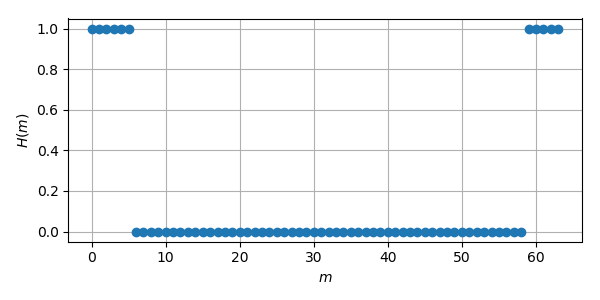

<IPython.core.display.Javascript object>


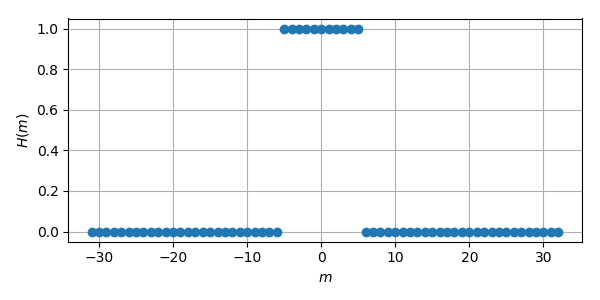

In [34]:
N = 64
H = np.zeros(N)

K2 = 5 # K/2+1

H[0:K2+1] = 1
H[N-K2:N] = 1


plt.figure()
plt.plot(H,'o')
plt.xlabel('$m$')
plt.ylabel('$H(m)$')
plt.grid()
plt.tight_layout()
plt.show()


m = np.arange(-int(N/2)+1,int(N/2)+1,1)
plt.figure()
Hs = np.zeros(N)
Hs[int(N/2)-1:] = H[0:int(N/2)+1]
Hs[0:int(N/2)-1]= H[int(N/2)+1:]
plt.plot(m,Hs,'o')
plt.xlabel('$m$')
plt.ylabel('$H(m)$')
plt.grid()
plt.tight_layout()
plt.show()
    

### Calculating the filter coefficients

We are now going to calculate the filter coefficients by doing the invers DFT
$$
h(k) = \frac{1}{N} \sum_{m=-(N/2)+1}^{N/2} H(m) e^{j 2\pi m k /N}
$$

<IPython.core.display.Javascript object>


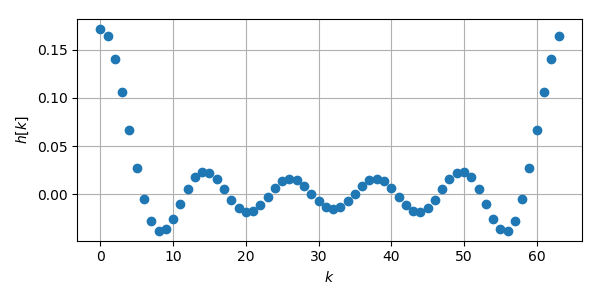

In [35]:
h = np.fft.ifft(H,N)
# Plot the figure
plt.figure()
plt.plot(h,'o')
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.grid()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


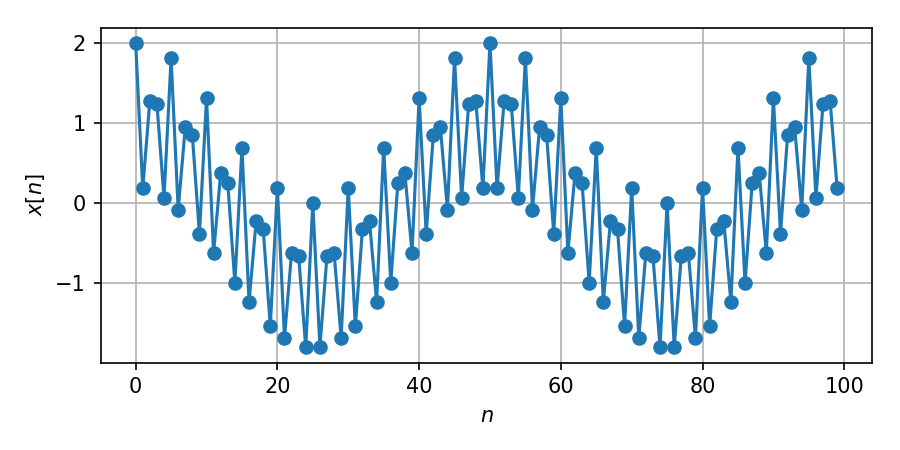

<IPython.core.display.Javascript object>


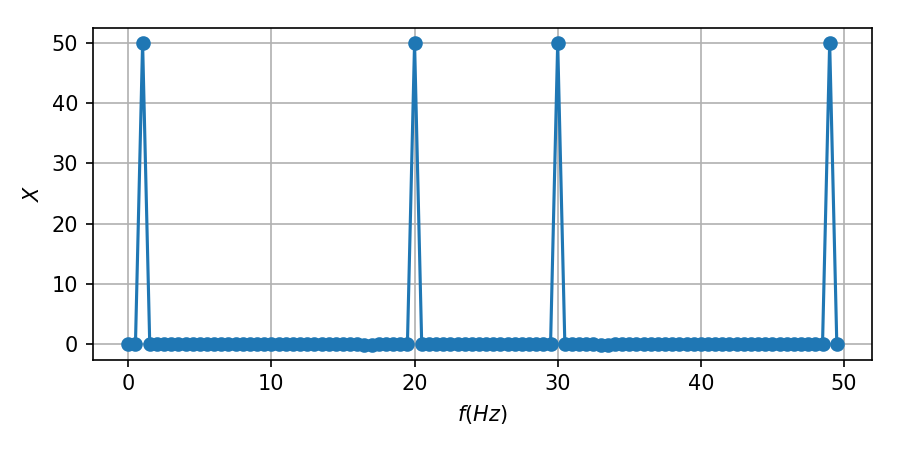

<IPython.core.display.Javascript object>


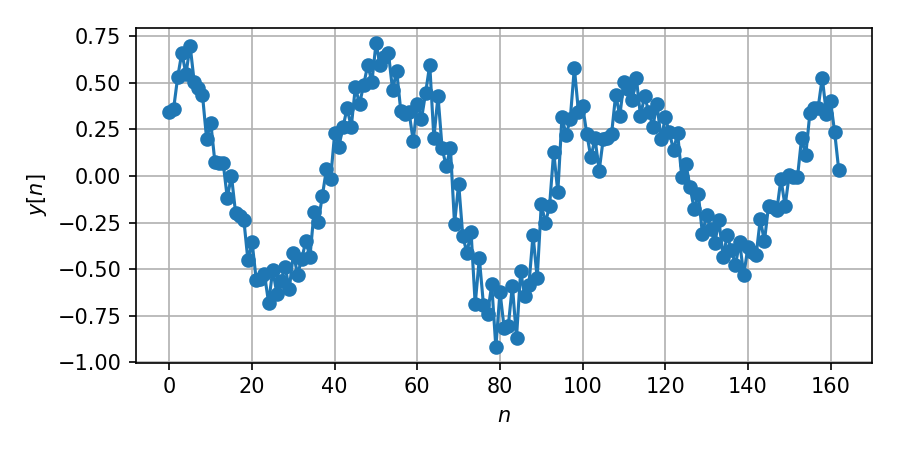

<IPython.core.display.Javascript object>


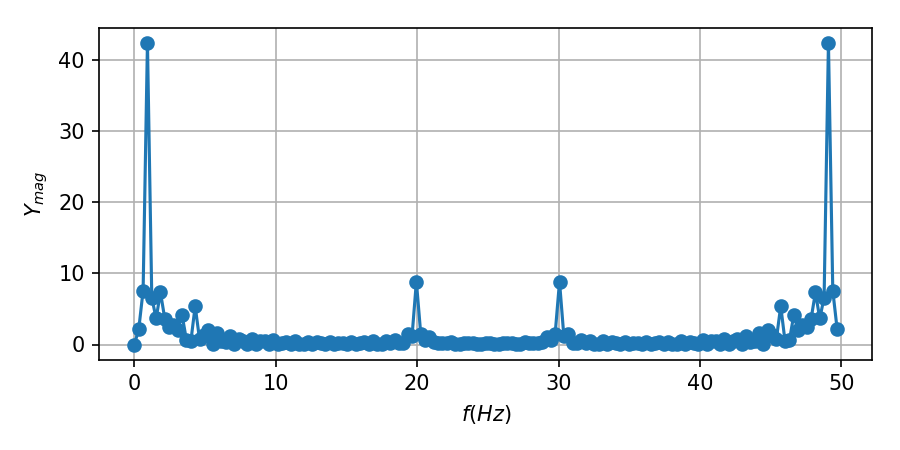

In [42]:
N=100
n=np.arange(N)
fs = 50 #Hz
ts = 1/fs #s 
f1=1 #Hz
f2=20 #Hz

x = np.cos(2*np.pi*f1*n*ts)+np.cos(2*np.pi*f2*n*ts)
plt.figure()
plt.plot(n,x,'-o')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.grid()
plt.tight_layout()
plt.show()


plt.figure()
plt.plot(n*fs/N,np.fft.fft(x),'-o')
plt.xlabel('$f (Hz)$')
plt.ylabel('$X$')
plt.grid()
plt.tight_layout()
plt.show()

y = np.convolve(h,x)

plt.figure()
plt.plot(y,'-o')
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(np.arange(len(y))*fs/len(y),np.abs(np.fft.fft(y)),'-o')
plt.xlabel('$f(Hz)$')
plt.ylabel('$Y_{mag}$')
plt.grid()
plt.tight_layout()
plt.show()



## A Chebyshev window
This example is from the documentation of the python function https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.chebwin.html

<IPython.core.display.Javascript object>


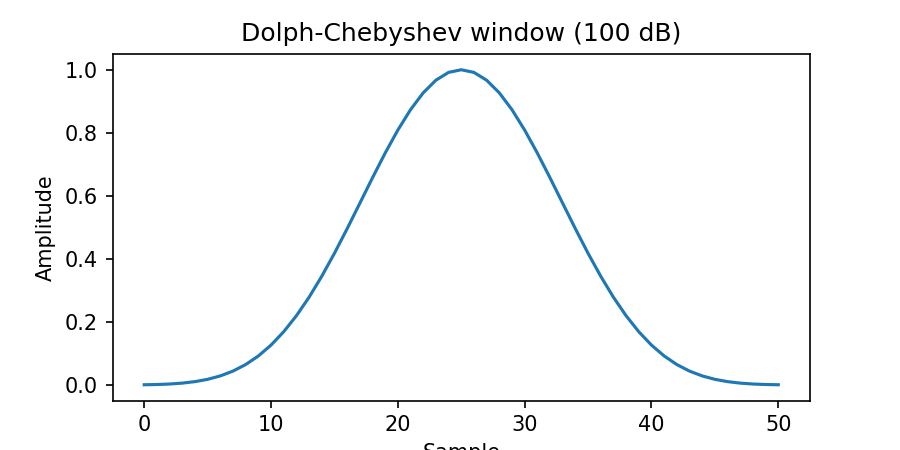

<IPython.core.display.Javascript object>


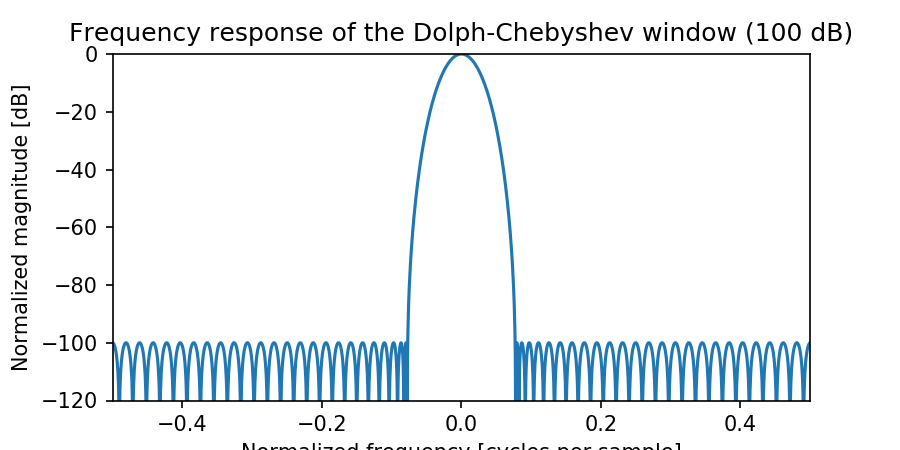

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

In [43]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
window = signal.chebwin(51, at=100)
plt.figure()
plt.plot(window)
plt.title("Dolph-Chebyshev window (100 dB)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")


plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Dolph-Chebyshev window (100 dB)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")